In [ ]:
filename = "IRIS.csv"

with open(filename, 'r') as file:
    lines = file.readlines()

headers = lines[0].strip().split(',')
data = [line.strip().split(',') for line in lines[1:]]

print("Headers:",headers)
print("Total Rows:", len(data))
print("First Row:", data[0])

Headers: ['"sepal_length"', '"sepal_width"', '"petal_length"', '"petal_width"', '"species"']
Total Rows: 150
First Row: ['"5.1"', '"3.5"', '"1.4"', '"0.2"', '"Iris-setosa"']


In [ ]:
column_data = [[] for _ in headers]

# Fill column-wise data
for row in data:
    if len(row) != len(headers):
        continue
    for i in range(len(headers)):
        column_data[i].append(row[i])

# Calculate stats
print("\n--- Column Statistics ---")
for i in range(len(headers)):
    try:
        # Strip quotes and convert to float
        values = [float(val.strip().replace('"', '')) for val in column_data[i]]
        n = len(values)
        total = sum(values)
        mean = total / n
        sorted_vals = sorted(values)
        median = sorted_vals[n // 2] if n % 2 == 1 else (sorted_vals[n // 2 - 1] + sorted_vals[n // 2]) / 2
        minimum = min(values)
        maximum = max(values)
        print(f"{headers[i]} -> Mean: {mean:.2f}, Median: {median}, Min: {minimum}, Max: {maximum}")
    except:
        unique = set([val.strip().replace('"', '') for val in column_data[i]])
        print(f"{headers[i]} -> Non-numeric column. Unique values: {unique}")


--- Column Statistics ---
"sepal_length" -> Non-numeric column. Unique values: {'"6.6"', '"6.7"', '"7.4"', '"6.2"', '"7.7"', '"5.3"', '"4.9"', '"6.8"', '"4.4"', '"7.3"', '"4.6"', '"4.5"', '"6.1"', '"4.7"', '"5.5"', '"5.7"', '"5.9"', '"7"', '"5"', '"6.4"', '"7.9"', '"5.4"', '"5.1"', '"7.2"', '"5.2"', '"6.9"', '"4.8"', '"6.3"', '"5.6"', '"4.3"', '"7.1"', '"7.6"', '"6.5"', '"6"', '"5.8"'}
"sepal_width" -> Non-numeric column. Unique values: {'"3.1"', '"4.2"', '"2.2"', '"2.9"', '"3"', '"4.4"', '"2"', '"3.2"', '"2.6"', '"2.4"', '"3.9"', '"2.7"', '"2.5"', '"4.1"', '"3.4"', '"4"', '"2.3"', '"2.8"', '"3.8"', '"3.7"', '"3.6"', '"3.5"', '"3.3"'}
"petal_length" -> Non-numeric column. Unique values: {'"6.6"', '"6.7"', '"4.2"', '"1.9"', '"5.3"', '"4.9"', '"1.5"', '"3"', '"4.4"', '"4.6"', '"4.5"', '"3.9"', '"4.7"', '"6.1"', '"5.5"', '"5.7"', '"1.4"', '"4.1"', '"4"', '"5.9"', '"5"', '"1"', '"6.4"', '"5.4"', '"3.8"', '"5.1"', '"1.1"', '"5.2"', '"6.9"', '"4.8"', '"1.2"', '"3.7"', '"6.3"', '"5.6"', '"3.

In [ ]:
print("\n--- Missing Values Check ---")
for i in range(len(headers)):
    missing = 0
    for row in data:
        if len(row) <= i:
            missing += 1  # Treat short rows as missing
        elif row[i].strip() == "" or row[i].strip().lower() == "nan":
            missing += 1
    print(f"{headers[i]} ➜ Missing values: {missing}")



--- Missing Values Check ---
"sepal_length" ➜ Missing values: 0
"sepal_width" ➜ Missing values: 0
"petal_length" ➜ Missing values: 0
"petal_width" ➜ Missing values: 0
"species" ➜ Missing values: 0


Train size: 124800, Test size: 20800
Shape of dataset: (5000, 785)
Total null values: 0


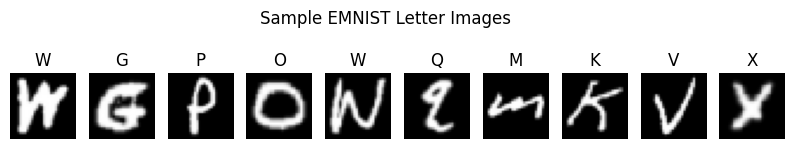

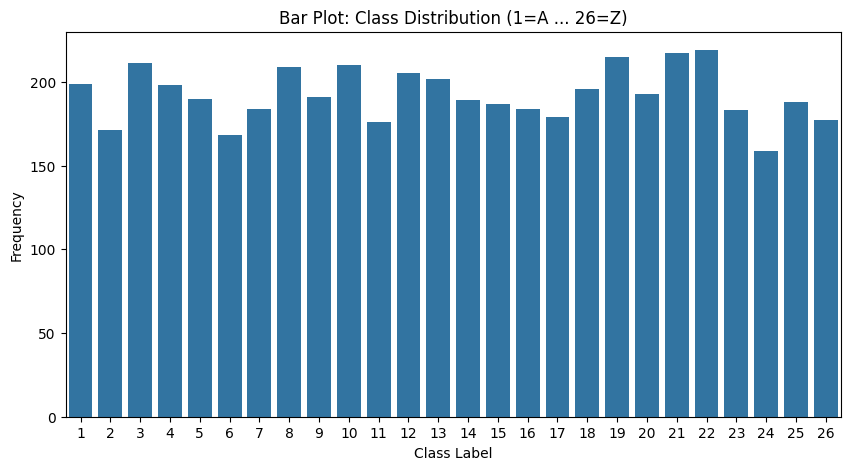

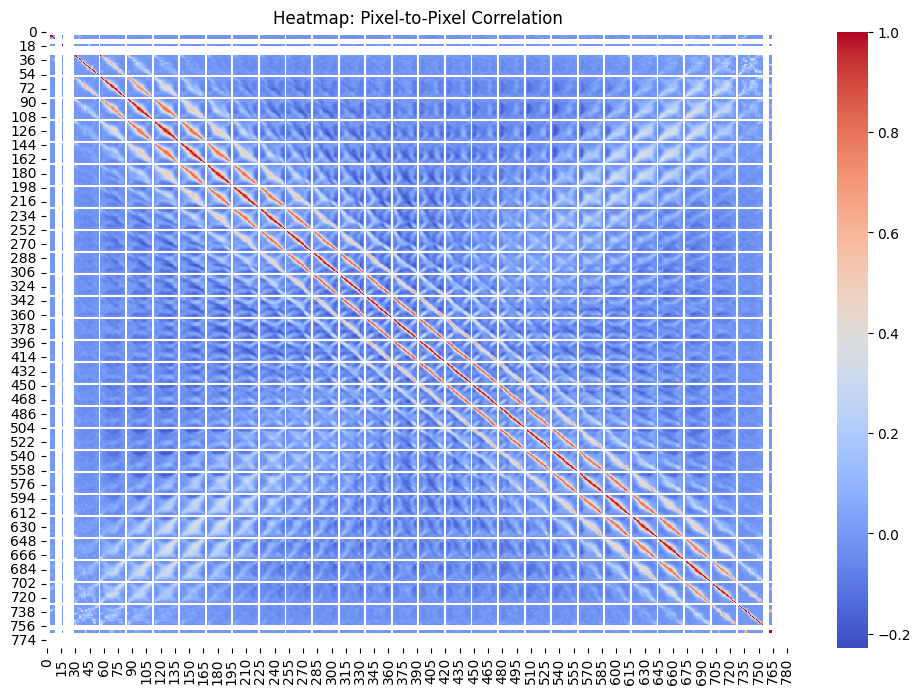

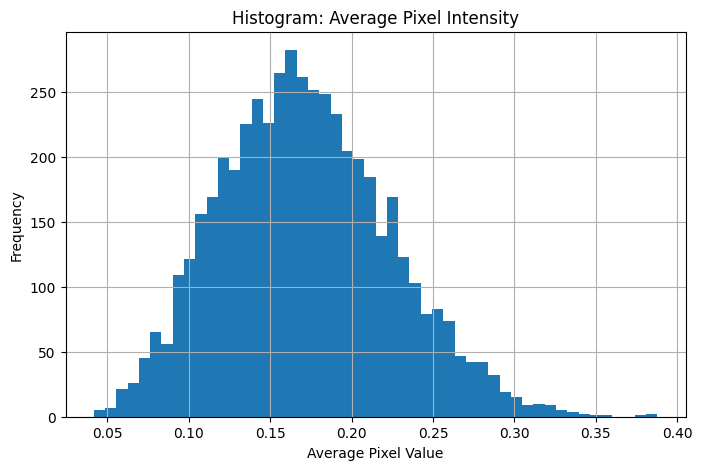

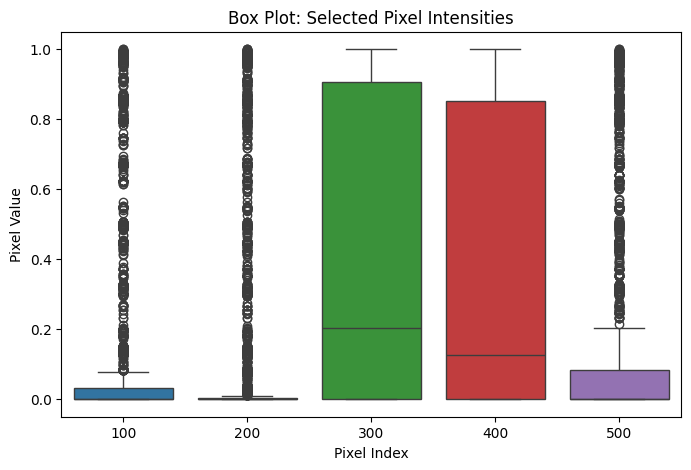

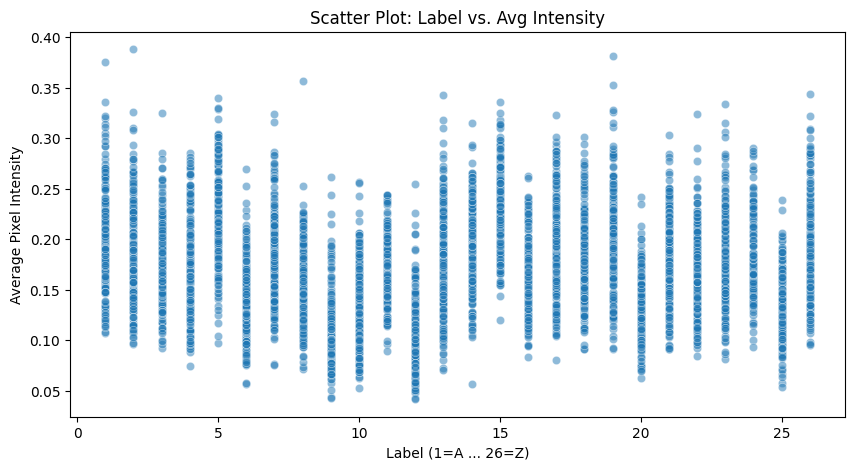

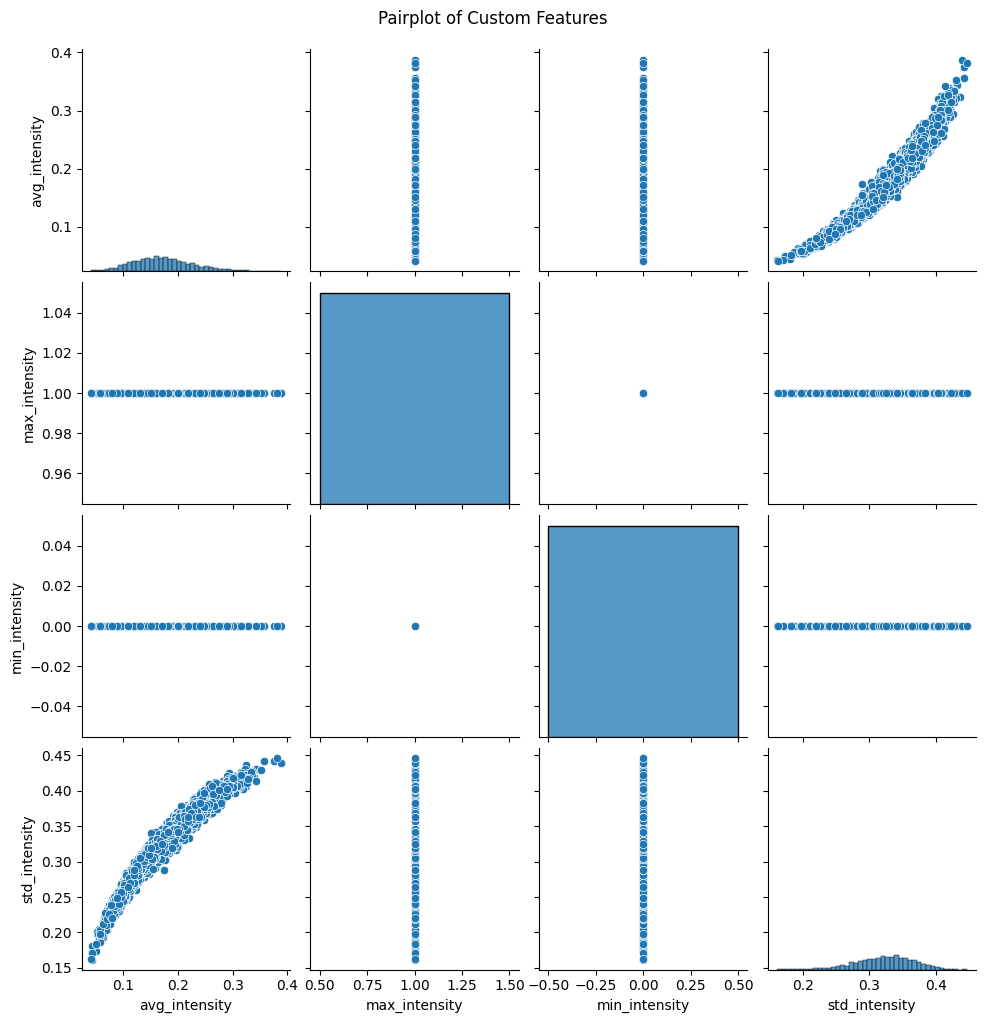

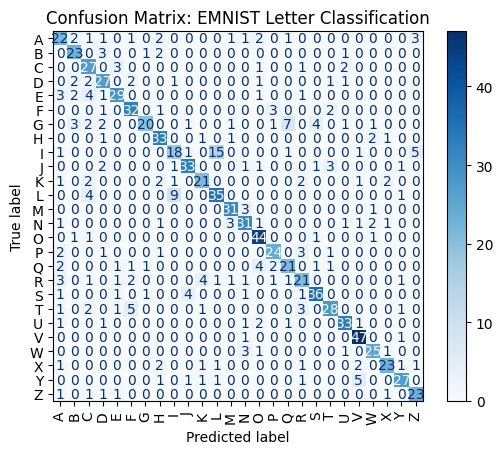

In [ ]:
# === Import Libraries ===
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === Step 1: Load EMNIST Dataset ===
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_data = datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transform)
test_data = datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

# === Step 2: Convert Data to DataFrame ===
X = []
y = []

for i in range(5000):  # Limit for speed
    image, label = train_data[i]
    X.append(image.numpy().reshape(-1))
    y.append(label)

df = pd.DataFrame(X)
df['label'] = y
print("Shape of dataset:", df.shape)

# === Step 3: Check for Nulls ===
print("Total null values:", df.isnull().sum().sum())

# === Step 4: Visualizations ===

# 4.1 Sample Images
def show_images(data, labels, n=10):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(data[i].reshape(28, 28).T, cmap='gray')
        plt.title(f"{chr(labels[i] + 64)}")
        plt.axis('off')
    plt.suptitle("Sample EMNIST Letter Images")
    plt.show()

show_images(X, y)

# 4.2 Bar Plot - Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df['label'])
plt.title("Bar Plot: Class Distribution (1=A ... 26=Z)")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

# 4.3 Heatmap of Pixel Correlations
plt.figure(figsize=(12, 8))
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Heatmap: Pixel-to-Pixel Correlation")
plt.show()

# === Step 5: Feature Engineering for EDA ===
df['avg_intensity'] = df.iloc[:, :784].mean(axis=1)
df['max_intensity'] = df.iloc[:, :784].max(axis=1)
df['min_intensity'] = df.iloc[:, :784].min(axis=1)
df['std_intensity'] = df.iloc[:, :784].std(axis=1)

# 5.1 Histogram of Average Pixel Intensity
plt.figure(figsize=(8, 5))
df['avg_intensity'].hist(bins=50)
plt.title("Histogram: Average Pixel Intensity")
plt.xlabel("Average Pixel Value")
plt.ylabel("Frequency")
plt.show()

# 5.2 Box Plot of Selected Pixels
sample_pixels = [100, 200, 300, 400, 500]
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[sample_pixels])
plt.title("Box Plot: Selected Pixel Intensities")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Value")
plt.show()

# 5.3 Scatter Plot: Label vs Average Intensity
plt.figure(figsize=(10, 5))
sns.scatterplot(x='label', y='avg_intensity', data=df, alpha=0.5)
plt.title("Scatter Plot: Label vs. Avg Intensity")
plt.xlabel("Label (1=A ... 26=Z)")
plt.ylabel("Average Pixel Intensity")
plt.show()

# 5.4 Pairplot of Custom Features
sns.pairplot(df[['avg_intensity', 'max_intensity', 'min_intensity', 'std_intensity']])
plt.suptitle("Pairplot of Custom Features", y=1.02)
plt.show()

# === Step 6: Classification ===
X_small = df.drop(['label'], axis=1)
y_small = df['label']

X_train, X_val, y_train, y_val = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

# Convert column names to strings to avoid TypeError
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

# === Step 7: Confusion Matrix ===
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[chr(i + 64) for i in range(1, 27)])
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix: EMNIST Letter Classification")
plt.show()